Import libraries

In [2]:
import numpy as np 
import pandas as pd 
from math import sqrt
import seaborn
import matplotlib.pyplot as plt

Read Dataset by using pandas library

In [3]:
df = pd.read_csv("/Users/essam/Desktop/Bootcamp/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

Plot some rows of dataset

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below

In [6]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Whether to print the full summary.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


Here We convert TimeStamp column into data and time format

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

Create Time stamp column as index of dataframe

In [9]:
df.set_index(df['Timestamp'], inplace=True)

Observe the null values of data frame

In [10]:
col = list(df.columns)
null_val = []
for i in col:
    null_val.append(df[i].isna().value_counts())
pd.DataFrame(null_val)

##Here observe that all columns contain null values

,False,True
Timestamp,4857377.0,NaN
Open,3613769.0,1243608.0
High,3613769.0,1243608.0
Low,3613769.0,1243608.0
Close,3613769.0,1243608.0
Volume_(BTC),3613769.0,1243608.0
Volume_(Currency),3613769.0,1243608.0
Weighted_Price,3613769.0,1243608.0


Now we remove the null rows from dataset

In [11]:
df.dropna(inplace=True)

Visualization of Dataset

<AxesSubplot:title={'center':'Correlation matrix of dataframe'}>

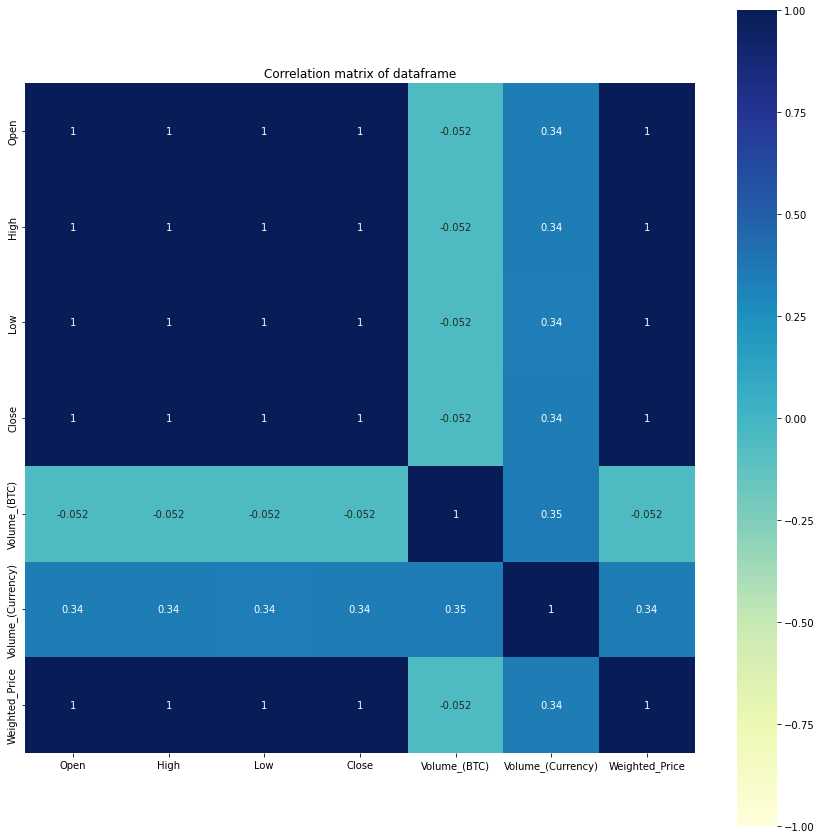

In [12]:
plt.figure(figsize = (15,15))
plt.title("Correlation matrix of dataframe")
mat = df.corr()
seaborn.heatmap(mat, vmin = -1.0, annot = True, square = True,cmap="YlGnBu")
###Here we plot the correlation matrix of dataframe that represent effect of variables on each others
##Here open, close, high, low and weighted price are highly correlated to each other

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

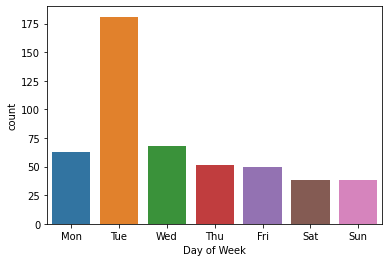

In [13]:
dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Timestamp'].dt.dayofweek.map(dayOfWeek)

# find indices with min value of that week
idx = df.groupby([pd.Grouper(key='Timestamp', freq='W-MON')])['Weighted_Price'].transform(min) == df['Weighted_Price']

# remove duplicate day rows
weekly_lows = df[idx].groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
weekly_lows = weekly_lows.dropna()


seaborn.countplot(x='Day of Week',data=weekly_lows, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
###Here we plot the count of week days and visualize the day on which maximum bitcoins records are avaliable 
##By observing the bar plot we conclude that maximum bitcoins records are belong to Tuesday

In [14]:
df.drop('Timestamp', axis=1, inplace=True)

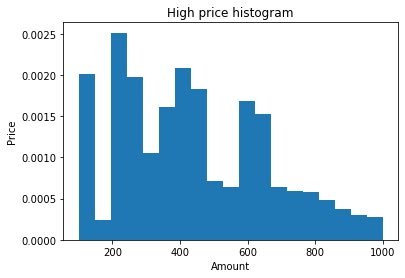

In [15]:
bins = np.linspace(100, 1000, 20)
plt.hist(df.High, bins, alpha=1, density=True)
plt.title("High price histogram")
plt.xlabel("Amount")
plt.ylabel("Price")
plt.show()
###Here we plot the high price of bitcoin

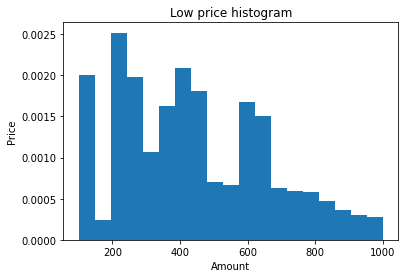

In [16]:
bins = np.linspace(100, 1000, 20)
plt.hist(df.Low, bins, alpha=1, density=True)
plt.title("Low price histogram")
plt.xlabel("Amount")
plt.ylabel("Price")
plt.show()
###Here we plot the Low price of bitcoin

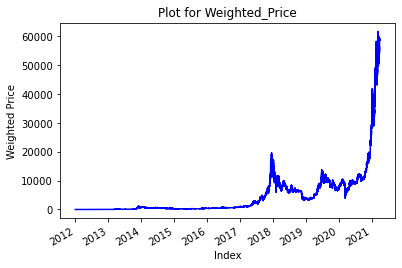

In [17]:
df.Weighted_Price.plot(kind = "line", color = "b", label = "Weighted_Price")
plt.xlabel("Index")            
plt.ylabel("Weighted Price")           
plt.title("Plot for Weighted_Price") 
plt.show()
####Here we plot the weighted price and observe that with time the price increase and reach to peak

Now we calculate the mean of weighted_price column accoring to date

In [18]:
df_new = df.groupby('Timestamp')
Real_Price = df_new['Weighted_Price'].mean()
Real_price=Real_Price[0:100]

In [27]:
from sklearn.preprocessing import MinMaxScaler


Scaling of dataframe

In [28]:
prediction_days = 60
df_train= Real_Price[:len(Real_Price)-prediction_days].values.reshape(-1,1)
df_test= Real_Price[len(Real_Price)-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

Split dataset into x and y

In [29]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

In [23]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

First Model

In [24]:
lstm = Sequential()
lstm.add(LSTM(units = 32, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
lstm.add(LSTM(units = 16, input_shape = (trainX.shape[1], trainX.shape[2])))
lstm.add(Dense(units = 1))
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_lstm = lstm.fit(trainX, trainY, batch_size = 32, epochs = 10, verbose=1, shuffle=False, validation_data=(testX, testY))

NameError: name 'Sequential' is not defined

In [30]:
from matplotlib import pyplot


In [31]:
pyplot.plot(history_lstm.history['loss'], label='train')
pyplot.plot(history_lstm.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

NameError: name 'history_lstm' is not defined

In [18]:
# Making the predictions
pred_BTC_price_lstm = lstm.predict(testX)
pred_BTC_price_lstm = scaler_test.inverse_transform(pre_BTC_price_lstm.reshape(-1, 1))

true = scaler_test.inverse_transform(testY.reshape(-1, 1))

In [ ]:
pyplot.plot(pre_BTC_price_lstm, label='predict')
pyplot.plot(true, label='true')
pyplot.legend()
pyplot.show()

Second Model

In [ ]:
Rnn = Sequential()
Rnn.add(SimpleRNN(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
Rnn.add(BatchNormalization())
Rnn.add(SimpleRNN(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
Rnn.add(Dense(units = 1))
Rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_rnn = Rnn.fit(trainX, trainY, batch_size = 32, epochs = 2, verbose=1, shuffle=False, validation_data=(testX, testY))

In [ ]:
pyplot.plot(history_rnn.history['loss'], label='train')
pyplot.plot(history_rnn.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Making the predictions
pre_BTC_price_Rnn = Rnn.predict(testX)
pre_BTC_price_Rnn = scaler_test.inverse_transform(predicted_BTC_price.reshape(-1, 1))
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

In [ ]:
pyplot.plot(pre_BTC_price_Rnn, label='predict')
pyplot.plot(true, label='true')
pyplot.legend()
pyplot.show()